In [18]:
import argparse
import os
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
model_dir = os.getcwd()
project_dir = os.path.dirname(model_dir)
data_dir = os.path.join(project_dir, 'fire_data')



In [19]:
path = os.path.join(data_dir,  'PlotSummaries.xlsx')
PlotSummaries = pd.read_excel(path, sheet_name = "Yosemite-ICB", skiprows=1)

In [20]:
PS = PlotSummaries[~PlotSummaries["Forestry Plot?"].isna()]
PS.index = PS["Plot Name"]

In [21]:
PS.head()

,Plot Name,Forestry Plot?,Aug2014,Aug2016,Jul2015,Jun2016,June2014,May2015,Sep2015,May2017,Jun2017,Aug2017,Jun2018,Grand Total
Plot Name,,,,,,,,,,,,,,
HZ1-1,HZ1-1,Yes,3.499063,3.0000,NaN,9.834667,6.454242,15.550000,NaN,NaN,16.308667,7.332000,7.373333,9.007717
L2-5,L2-5,Yes,NaN,0.2456,NaN,5.934400,3.484000,8.696765,NaN,NaN,6.056000,3.045600,NaN,4.769817
L3-3,L3-3,Yes,NaN,0.0440,2.7608,3.227600,2.302941,6.359583,NaN,NaN,2.578182,NaN,NaN,2.828774
L3-5,L3-5,Yes,6.092333,0.9740,3.6520,11.754000,7.190333,13.758800,NaN,NaN,15.799600,8.189200,NaN,8.341286
Met Stn Forest,Met Stn Forest,Yes,NaN,NaN,2.5080,6.605758,NaN,NaN,0.496667,8.738788,5.144545,1.337576,2.540606,4.519890


In [22]:
path = os.path.join(data_dir,  'PlotsEnviroBiomass.xlsx')
EnvironmentData = pd.read_excel(path, sheet_name = "EnvironmentData", skiprows=0)

SEQI_YOSE_2014_Table = pd.read_excel(path, sheet_name = "SEQI_YOSE_2014_Table", skiprows=0)
RECENT_BS = SEQI_YOSE_2014_Table.RECENT_BS

In [23]:
EnvironmentData.head()

,PLOT,ASPECT,AspectGroup,SLOPEpct,Canopy,ROCK,TimeSinceFire2012,TimeSinceFire2002,Unnamed: 8,PlotNumber,BA.m2.ha (DEAD),BA.m2.ha(LIVE),LAI,ABG.Mg.ha,LiveBA(check)
0,L2-1,280,270,6,16,3,11,1,1,L2-1,23.644815,10.270021,0.795777,47.789467,10.270021
1,L2-3,238,270,8,4,3,11,1,1,L2-3,4.247998,11.729134,1.366020,44.825452,11.729134
2,L2-4,307,270,7,16,3,11,1,1,L2-4,40.728761,NaN,NaN,NaN,NaN
3,L2-5,260,270,7,20,3,11,1,1,L2-5,24.450398,18.457324,1.547394,99.462402,18.457324
4,L3-1,1,0,10,36,3,11,1,1,L3-1,14.383465,17.084920,1.580131,79.259116,17.084920


In [24]:
path = os.path.join(data_dir, 'soil_moisture', 'SoilMoisture_AllDates_through_Jun_2018.xlsx')

AllTDR = pd.read_excel(path, sheet_name = "AllTDR", skiprows=0)


In [25]:
combine = EnvironmentData.copy()

combine.index = EnvironmentData.PLOT
combine = combine[['TimeSinceFire2012', 'BA.m2.ha(LIVE)', 'BA.m2.ha (DEAD)', 'ABG.Mg.ha' ]]

In [26]:
EnvironmentData.columns

Index(['PLOT', 'ASPECT', 'AspectGroup', 'SLOPEpct', 'Canopy', 'ROCK',
       'TimeSinceFire2012', 'TimeSinceFire2002', 'Unnamed: 8', 'PlotNumber',
       'BA.m2.ha (DEAD)', 'BA.m2.ha(LIVE)', 'LAI', 'ABG.Mg.ha',
       'LiveBA(check)'],
      dtype='object')

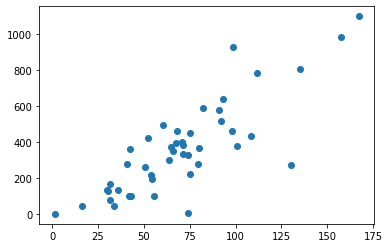

In [27]:
plt.plot(EnvironmentData['BA.m2.ha (DEAD)']+EnvironmentData['BA.m2.ha(LIVE)'], EnvironmentData['ABG.Mg.ha'], 'o')

(0, 100)

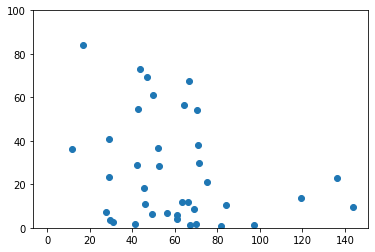

In [28]:
plt.plot(EnvironmentData['BA.m2.ha(LIVE)'], EnvironmentData['BA.m2.ha (DEAD)']/EnvironmentData['BA.m2.ha(LIVE)']*100, 'o')
plt.ylim(0, 100)

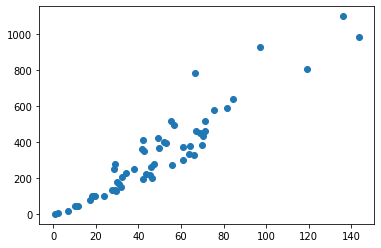

In [29]:
plt.plot(EnvironmentData['BA.m2.ha(LIVE)'], EnvironmentData['ABG.Mg.ha'], 'o')

In [30]:
missing = []
for ind in combine.index: 
#     if ind in PS['Plot Name'].unique():
#         combine.at[ind, "Grand Total"] = PS.at[ind, "Grand Total"]
#     else:
#             missing.append( ind + " not in  PlotSummaries")
            
    if ind in (AllTDR["Site"]).unique():                        
        combine.at[ind, "Veg"] =  AllTDR[(AllTDR.Site == ind)]['Veg'].mode()[0]
        missing.append (ind + " " +  AllTDR[(AllTDR.Site == ind)]['Veg'].mode()[0] )
    else: 
            missing.append(ind + " not in AllTDR")

    if ind in SEQI_YOSE_2014_Table['PLOT'].unique():
        combine.at[ind, "RECENT_BS"] =  SEQI_YOSE_2014_Table[(SEQI_YOSE_2014_Table.PLOT == ind)]['RECENT_BS'].mode()[0]

In [31]:
# missings

In [32]:
combine = combine[~ combine["Veg"].isna()]

In [33]:
combine.sort_values("RECENT_BS")

,TimeSinceFire2012,BA.m2.ha(LIVE),BA.m2.ha (DEAD),ABG.Mg.ha,RECENT_BS,Veg
PLOT,,,,,,
P1-2,30,63.533153,7.619649,333.933235,0.0,"Conifer, mix con"
P1-3,30,46.441134,NaN,202.244377,0.0,Shrub
P2-3,11,70.057847,1.106123,384.987984,1.0,"Conifer, abco"
W2-3,11,23.909808,31.828332,103.529859,1.0,"Conifer, abco"
W2-11,18,66.646895,44.935306,787.226180,1.0,Shrub
P4-4,16,43.558393,31.834820,221.672033,1.0,"Conifer, abco"
W2-4,11,143.591159,13.989682,986.135976,1.0,"Conifer, mix con"
W2-7,18,51.977216,19.006632,402.948513,1.0,"Conifer, abco"
L3-3,30,30.783910,0.776979,166.304744,1.0,"Conifer, pije"


In [34]:
for a in combine.index:
    if 'Con' in combine.loc[a, 'Veg']:
        combine.loc[a, 'SimpleVeg'] = "Conifer"
    else:
        combine.loc[a, 'SimpleVeg'] = combine.loc[a, 'Veg']

In [35]:
combine[combine.RECENT_BS > 1].sort_values("RECENT_BS")

,TimeSinceFire2012,BA.m2.ha(LIVE),BA.m2.ha (DEAD),ABG.Mg.ha,RECENT_BS,Veg,SimpleVeg
PLOT,,,,,,,
L2-5,11,18.457324,24.450398,99.462402,2.0,Sparse Meadow,Sparse Meadow
L3-5,11,NaN,86.331875,NaN,2.0,Wet Meadow,Wet Meadow
P1-6,8,42.505536,23.187981,353.755345,2.0,"Conifer, abco",Conifer
P1-8,8,45.536276,8.431452,219.771304,2.0,"Conifer, abco",Conifer
P2-1,11,NaN,31.281664,NaN,2.0,Sparse Meadow,Sparse Meadow
P2-2,11,61.058930,2.468647,300.990731,2.0,"Conifer, mix fir rec",Conifer
P2-5,11,NaN,36.338339,NaN,2.0,Sparse meadow,Sparse meadow
P2-6,11,56.501846,3.735353,493.920511,2.0,"Conifer, abco",Conifer
P2-8,11,67.142261,0.712042,460.349763,2.0,Sparse Meadow,Sparse Meadow


Questions about: 
1. Biomass in this spreadsheet
2. Initializing with spatial data (1969 veg and 2012 soil moisture) -  
   prescribe fire probability as normal dist matching the mean?  or with (non-point) fire statistics from region?
   handle transitions?   

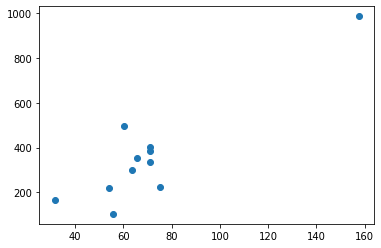

In [36]:
conifer = combine[combine['SimpleVeg'] == "Conifer"]
plt.scatter(conifer["BA.m2.ha(LIVE)"] +conifer["BA.m2.ha (DEAD)"], conifer["ABG.Mg.ha"])

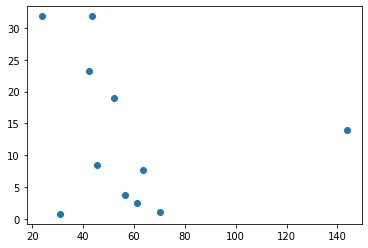

In [37]:
conifer = combine[combine['SimpleVeg'] == "Conifer"]
plt.scatter(conifer["BA.m2.ha(LIVE)"], conifer["BA.m2.ha (DEAD)"])

## Read Katya's data

In [38]:
path = os.path.join(data_dir, 'soil_moisture', 'SoilMoisture_AllDates_through_Jun_2018.xlsx')

xl = pd.ExcelFile(path)

for sheet_name in xl.sheet_names:
    df = pd.read_excel(path, sheet_name= sheet_name)
    df.dropna(how="all", inplace=True)
    sheet_name = sheet_name.replace(" ", "_").replace(",", "_") 
    exec(sheet_name + ' = df' )